In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/home/ubuntu/workspace/src'

In [3]:
movies = pd.read_csv('Data/Movie-Ratings.csv')

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index([u'Film', u'Genre', u'Rotten Tomatoes Ratings %', u'Audience Ratings %',
       u'Budget (million $)', u'Year of release'],
      dtype='object')

In [7]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillion', 'Year'] # rename columns

In [8]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info() # get info of data.frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe() # for year the numbers do not make much sense! -> year is not a number, but more a category

,CriticRating,AudienceRating,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
movies.Film = movies.Film.astype('category') # change date column to 'category'

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [13]:
movies.Genre = movies.Genre.astype('category') 
movies.Year = movies.Year.astype('category') 

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [15]:
movies.Genre.cat.categories # get all categories in this column

Index([u'Action', u'Adventure', u'Comedy', u'Drama', u'Horror', u'Romance',
       u'Thriller'],
      dtype='object')

In [16]:
movies.describe() # now the category variables are excluded

,CriticRating,AudienceRating,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

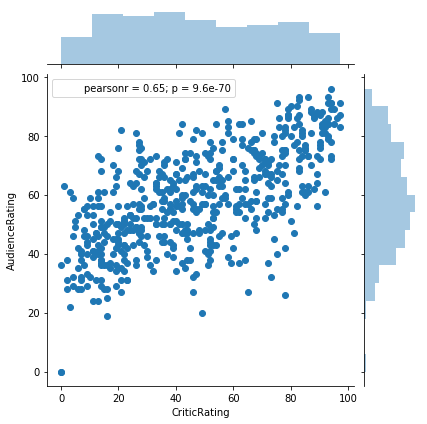

In [18]:
#Jointplot
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating') # scatterplot that shows the relationship between audience and critic rating

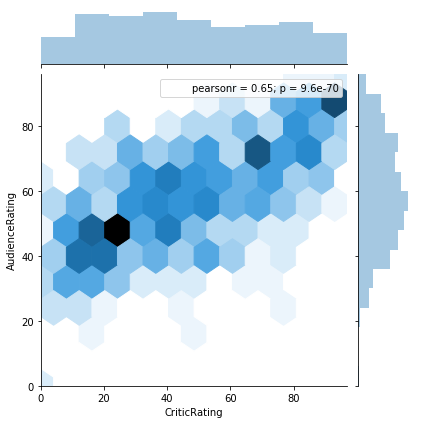

In [19]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

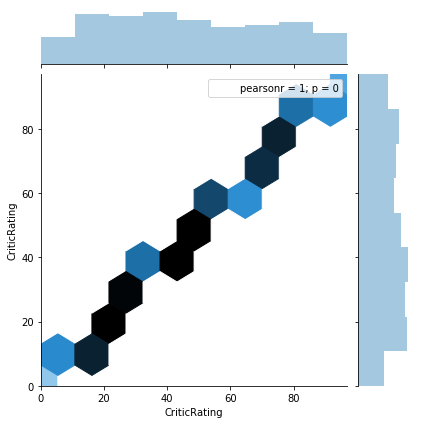

In [20]:
# chart number 1
j = sns.jointplot(data=movies, x='CriticRating', y='CriticRating', kind='hex')

---

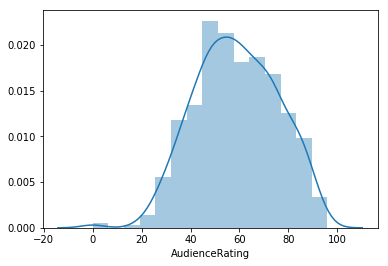

In [21]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

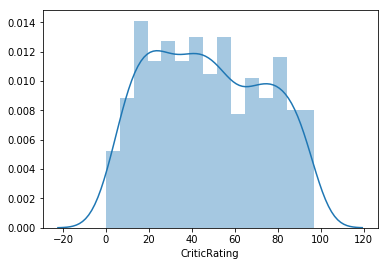

In [22]:
m2 = sns.distplot(movies.CriticRating, bins=15)

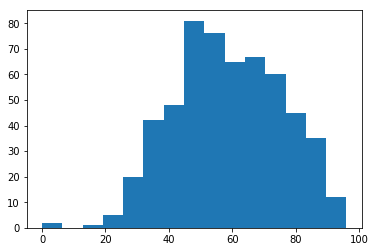

In [23]:
# plt plot version of that chart
n1 = plt.hist(movies.AudienceRating, bins=15) # is more normal distributed, because emotion is usually this way!

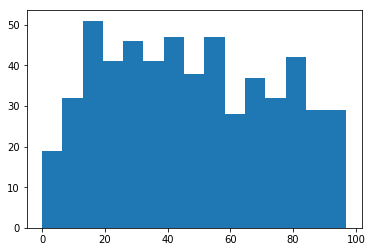

In [24]:
n1 = plt.hist(movies.CriticRating, bins=15) # is more uniform distributed, cause they have a rating concept behind it

In [25]:
#<<<< Chart 3 - Stacked Distribution Chart

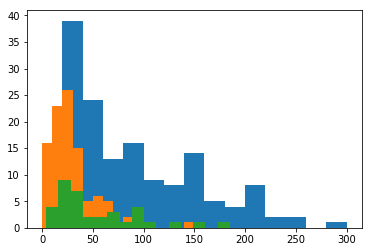

In [26]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillion, bins=15)
plt.show()

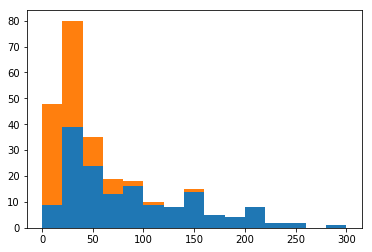

In [27]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillion, movies[movies.Genre == 'Drama'].BudgetMillion], bins=15, stacked=True)
plt.show()

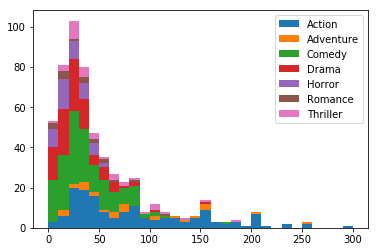

In [28]:
# automated chart building
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillion)#
    mylabels.append(gen)
plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

In [29]:
movies.Genre.cat.categories

Index([u'Action', u'Adventure', u'Comedy', u'Drama', u'Horror', u'Romance',
       u'Thriller'],
      dtype='object')

In [30]:
#KDE Plot

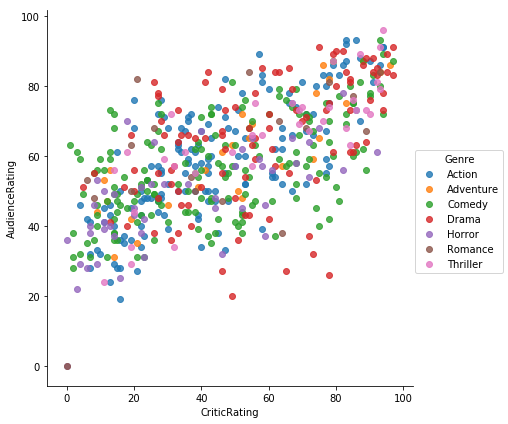

In [34]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', size=6, aspect=1)

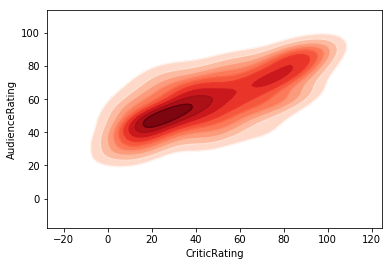

In [44]:
vis2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', size=7, aspect=1)

#Tipcombine two plots
vis2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', size=7, aspect=1)

---

In [45]:
# Create Subplots

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

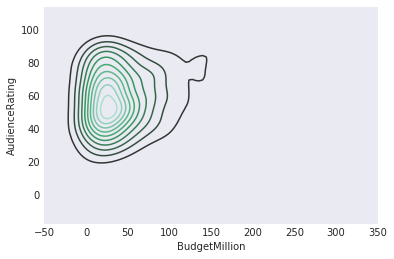

In [49]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating)

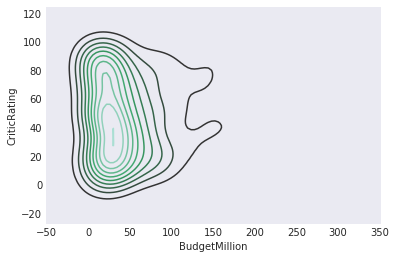

In [55]:
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating)

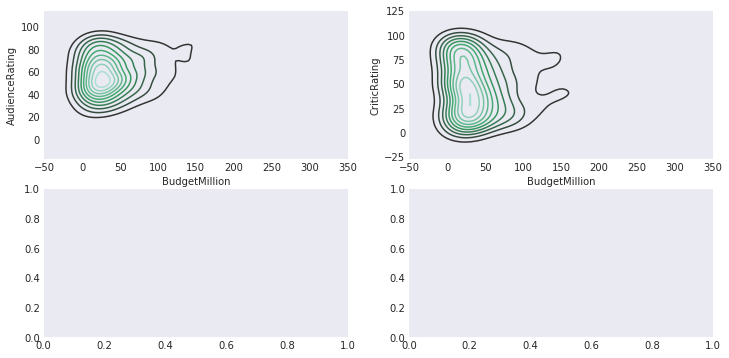

In [60]:
f, axes = plt.subplots(2,2, figsize=(12,6)) # create subplots
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax=axes[0,1])

[(-20, 160)]

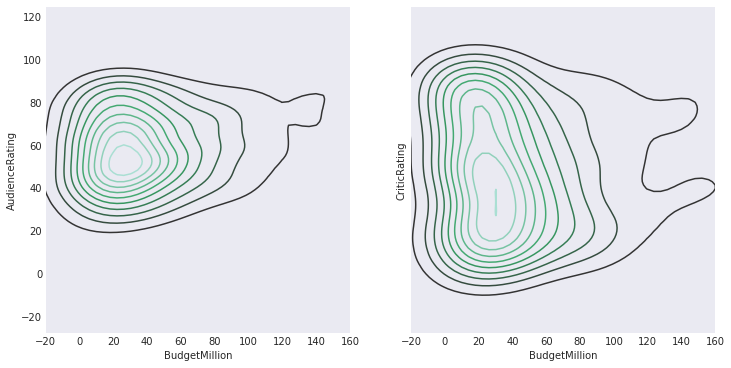

In [64]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True) # create subplots
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))